# Load Packages

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
edge1 = pd.read_csv("Edgelist2019_2.csv")
edge2 = pd.read_csv("Edgelist2020_1.csv")
edge3 = pd.read_csv("Edgelist2020_2.csv")
icd10 = pd.read_csv("icd10cm_codes_prev_2021.csv")

# Basic Graph Info

### Define the functions

In [109]:
def convert_graph(edgelist,name):
  graph = nx.convert_matrix.from_pandas_edgelist(edgelist,source='Source', target='Target', edge_attr=True)
  graph.name = "Covid DisNet for" + " " + name
  print(nx.info(graph))
  print("------------------------------------")
  print("************************************")
  print("------------------------------------")
  return graph

In [118]:
def basic_info(graph,name):
  number_of_triangles = sum(nx.triangles(graph).values()) / 3
  transitivity = nx.algorithms.cluster.transitivity(graph)
  avg_clustering_coef = nx.average_clustering(graph)
  print(" ") 
  print(" ")  
  print("Information for the graph of",name)
  table = pd.DataFrame({"number of triangles":[number_of_triangles],
                        "transitivity":[transitivity],
                        "average clustering coefficient":[avg_clustering_coef]})
  return print(table.to_string(index=False))


### Analysis

In [110]:
%%time
graph1 = convert_graph(edge1,"2019-2")
graph2 = convert_graph(edge2,"2020-1")
graph3 = convert_graph(edge3,"2020-2")

Name: Covid DisNet for 2019-2
Type: Graph
Number of nodes: 2075
Number of edges: 28925
Average degree:  27.8795
------------------------------------
************************************
------------------------------------
Name: Covid DisNet for 2020-1
Type: Graph
Number of nodes: 2049
Number of edges: 28980
Average degree:  28.2870
------------------------------------
************************************
------------------------------------
Name: Covid DisNet for 2020-2
Type: Graph
Number of nodes: 2101
Number of edges: 30105
Average degree:  28.6578
------------------------------------
************************************
------------------------------------
CPU times: user 444 ms, sys: 5.92 ms, total: 450 ms
Wall time: 455 ms


In [119]:
%%time
basic_info(graph1,"2019-2")
basic_info(graph2,"2020-1")
basic_info(graph3,"2020-2")

 
 
Information for the graph of 2019-2
 number of triangles  transitivity  average clustering coefficient
            791705.0      0.493457                        0.467797
 
 
Information for the graph of 2020-1
 number of triangles  transitivity  average clustering coefficient
            804995.0      0.494684                        0.468307
 
 
Information for the graph of 2020-2
 number of triangles  transitivity  average clustering coefficient
            842044.0      0.490647                        0.478485
CPU times: user 13.7 s, sys: 19.1 ms, total: 13.7 s
Wall time: 13.7 s


# Prevalence Trending Analysis

Text(0.5, 1.0, 'Change from Pre to Outbreak')

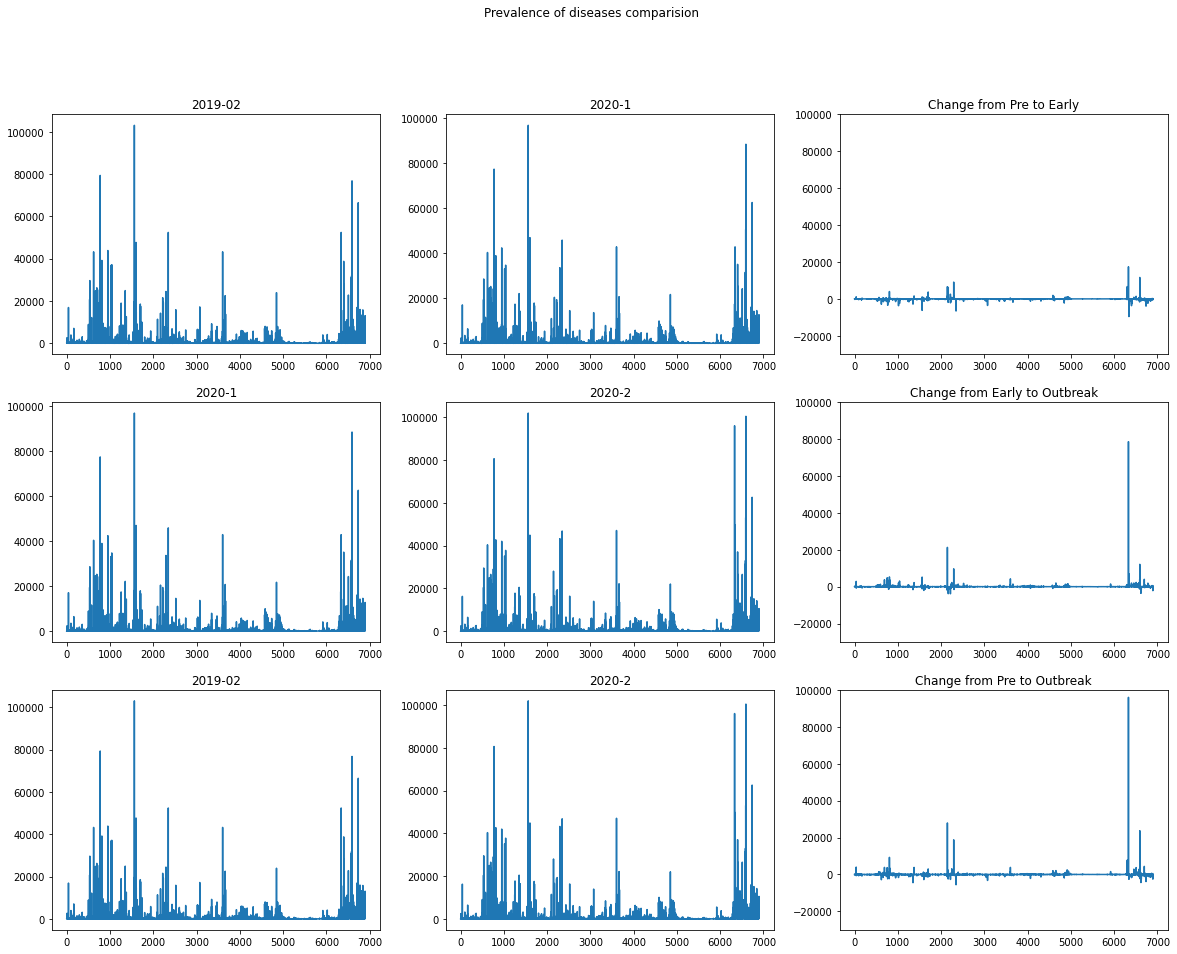

In [154]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
fig.suptitle('Prevalence of diseases comparision')
axs[0,0].plot(icd10.Prevalence_20192)
axs[0,0].set_title("2019-02",loc='center')
axs[0,1].plot(icd10.Prevalence_20201)
axs[0,1].set_title("2020-1",loc='center')
axs[0,2].plot(icd10.Prevalence_20201-icd10.Prevalence_20192)
axs[0,2].set_ylim([-30000,100000])
axs[0,2].set_title("Change from Pre to Early",loc='center')

axs[1,0].plot(icd10.Prevalence_20201)
axs[1,0].set_title("2020-1",loc='center')
axs[1,1].plot(icd10.Prevalence_20202)
axs[1,1].set_title("2020-2",loc='center')
axs[1,2].plot(icd10.Prevalence_20202-icd10.Prevalence_20201)
axs[1,2].set_ylim([-30000,100000])
axs[1,2].set_title("Change from Early to Outbreak",loc='center')

axs[2,0].plot(icd10.Prevalence_20192)
axs[2,0].set_title("2019-02",loc='center')
axs[2,1].plot(icd10.Prevalence_20202)
axs[2,1].set_title("2020-2",loc='center')
axs[2,2].plot(icd10.Prevalence_20202-icd10.Prevalence_20192)
axs[2,2].set_ylim([-30000,100000])
axs[2,2].set_title("Change from Pre to Outbreak",loc='center')

In [108]:
id = list(dict(graph1.degree(weight="Weight")).keys())
len(id)

2075

In [72]:
icd10[icd10.Id.isin(id)]

,Id,alphabet,Description,Category,Prevalence_20192,Prevalence_20201,Prevalence_20202
7,a0472,a,"Enterocolitis due to Clostridium difficile, no...",Certain infectious and parasitic diseases,2669,2365,2499
14,a0839,a,Other viral enteritis,Certain infectious and parasitic diseases,55,101,343
15,a084,a,"Viral intestinal infection, unspecified",Certain infectious and parasitic diseases,597,435,359
25,a403,a,Sepsis due to Streptococcus pneumoniae,Certain infectious and parasitic diseases,51,118,63
28,a4101,a,Sepsis due to Methicillin susceptible Staphylo...,Certain infectious and parasitic diseases,688,606,661
...,...,...,...,...,...,...,...
6893,z9911,z,Dependence on respirator [ventilator] status,Other health services,1512,1712,1797
6894,z992,z,Dependence on renal dialysis,Other health services,9768,9692,10254
6895,z993,z,Dependence on wheelchair,Other health services,2605,2349,2252
6896,z9981,z,Dependence on supplemental oxygen,Other health services,13081,12713,10545


In [ ]:
degree_centrality = nx.algorithms.centrality.degree_centrality(graph)
first10pairs = {k: degree_centrality[k] for k in sorted(degree_centrality.keys())[:10]}
first10pairs

{'a0472': 0.029523809523809525,
 'a0839': 0.0009523809523809524,
 'a403': 0.0004761904761904762,
 'a4101': 0.0014285714285714286,
 'a4102': 0.0009523809523809524,
 'a414': 0.0004761904761904762,
 'a4151': 0.007142857142857143,
 'a4152': 0.0004761904761904762,
 'a4159': 0.002857142857142857,
 'a4189': 0.047142857142857146}

In [ ]:
eigenvector_centrality = nx.algorithms.centrality.eigenvector_centrality_numpy(graph)
first10pairs = {k: eigenvector_centrality[k] for k in sorted(eigenvector_centrality.keys())[:10]}
first10pairs

{'a0472': 0.028865883398139978,
 'a0839': 0.0009338308525216134,
 'a403': -1.910580976727113e-18,
 'a4101': 0.0003981326292866526,
 'a4102': 1.0572806113661003e-05,
 'a414': 0.00016837607865647814,
 'a4151': 0.005496076889414611,
 'a4152': 1.1188211825370778e-05,
 'a4159': 0.0015348730393305993,
 'a4189': 0.039779899864510776}

In [ ]:
katz_centrality = nx.algorithms.centrality.katz_centrality_numpy(graph)
first10pairs = {k: katz_centrality[k] for k in sorted(katz_centrality.keys())[:10]}
first10pairs

{'a0472': -0.05597927468417884,
 'a0839': 0.012955270247768406,
 'a403': 0.0016005343887325531,
 'a4101': 0.001194441681456632,
 'a4102': 0.003237604975812472,
 'a414': -0.004157446518558565,
 'a4151': 0.019922031952683765,
 'a4152': 0.003398487389935315,
 'a4159': -0.00495440684006463,
 'a4189': 0.05672733739024446}